# CODE TO DETECT LANE LINES IN AN IMAGE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

(540, 956, 3)

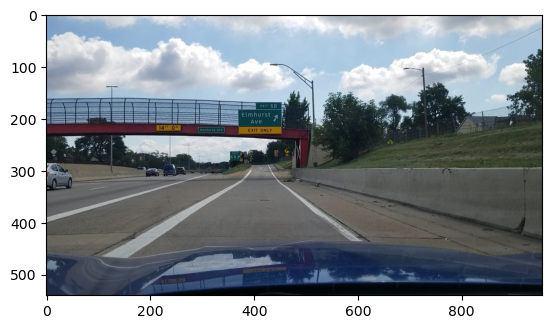

In [2]:
image_c = mpimg.imread("new_test_image_3.jpg")
plt.imshow(image_c)
image_c.shape

## convert to grayscale

(540, 956)

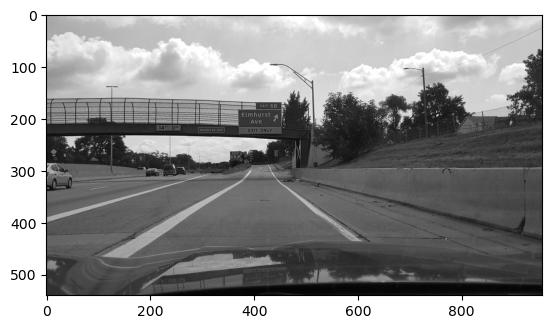

In [3]:
image_g  = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
plt.imshow(image_g,cmap="gray")
image_g.shape

## gaussian blurring and canny

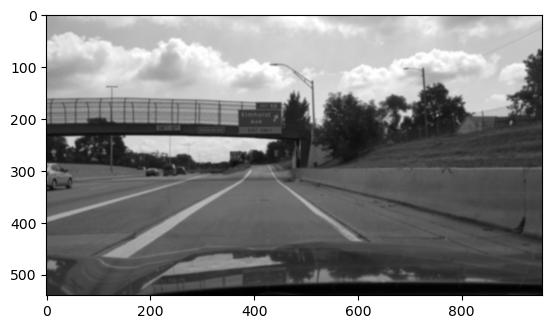

In [4]:
image_blurred = cv2.GaussianBlur(image_g, (7,7), 0)
plt.imshow(image_blurred,cmap="gray")

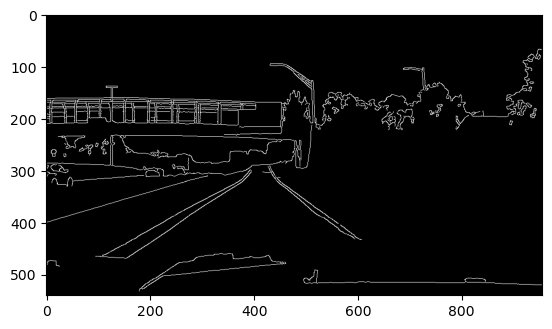

In [6]:
threshold_low = 10
thershold_high = 200

image_canny = cv2.Canny(image_blurred, threshold_low, thershold_high)
plt.imshow(image_canny,cmap="gray")

## define region of interest

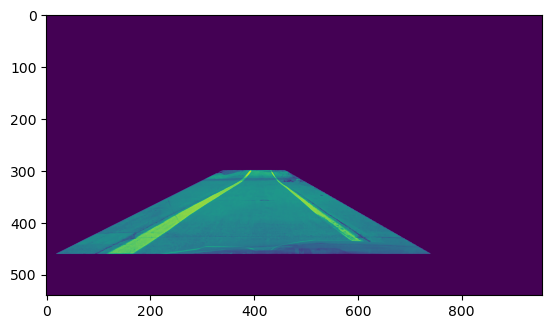

In [9]:
vertices = np.array([[(20,460),(340,300),(460,300),(740,460)]], dtype = np.int32)
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

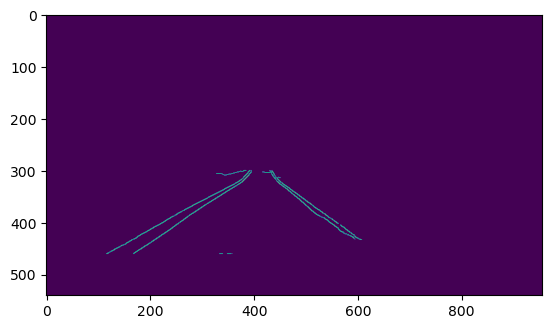

In [10]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.imshow(masked_image)

## hough lines detection and draw function

In [14]:
rho = 2
theta = np.pi/180
threshold = 40
min_lines_len = 100
max_line_gap = 50

lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_lines_len, maxLineGap=max_line_gap)

line_image = np.zeros((masked_image.shape[0],masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[255,0,0],20)
        
lines

array([[[169, 460, 387, 313]],

       [[142, 447, 284, 366]],

       [[423, 304, 608, 433]],

       [[418, 303, 576, 422]],

       [[270, 390, 378, 322]],

       [[153, 442, 294, 361]],

       [[227, 422, 369, 323]],

       [[480, 342, 592, 423]]], dtype=int32)

In [16]:
a = 1
b = 1
c = 0

image_with_lines = cv2.addWeighted(image_c, a, line_image, b, c)

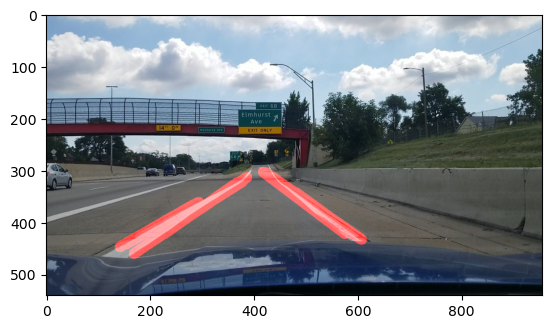

In [17]:
plt.figure()
plt.imshow(image_with_lines)